In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')
%matplotlib inline
# plt.style.use('ggplot')

In [2]:
df=pd.read_csv("dataset_tk.csv")
df.tail()

,Unnamed: 0,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
498,01/12/2020 00:00:00,130.8,126.0,220.4,77.3,322.8,36.5,25.4,45.4,3.6,...,105.7,172.6,1.4,2.1,20.4,2.1,5.4,1.8,2.0,2.4
499,02/12/2020 00:00:00,129.4,127.3,218.4,81.3,331.4,37.0,25.8,45.2,3.7,...,112.3,174.4,1.5,2.1,23.3,2.4,5.4,1.6,2.1,3.3
500,03/12/2020 00:00:00,132.1,129.7,205.6,85.6,336.7,37.8,26.2,45.2,4.0,...,113.0,169.8,1.4,2.1,21.7,2.3,5.4,1.5,2.0,3.6
501,04/12/2020 00:00:00,132.1,128.4,207.0,83.9,334.6,38.2,27.0,43.0,4.0,...,111.6,145.5,1.2,2.0,24.2,2.5,5.7,1.6,2.0,3.3
502,05/12/2020 00:00:00,120.4,111.2,201.4,83.6,287.3,35.2,24.3,42.6,3.5,...,95.1,110.4,1.2,2.1,20.3,2.5,5.8,1.6,2.1,3.3


In [3]:
df.columns

Index(['Unnamed: 0', 'Punjab', 'Haryana', 'Rajasthan', 'Delhi', 'UP',
       'Uttarakhand', 'HP', 'J&K', 'Chandigarh', 'Chhattisgarh', 'Gujarat',
       'MP', 'Maharashtra', 'Goa', 'DNH', 'Andhra Pradesh', 'Telangana',
       'Karnataka', 'Kerala', 'Tamil Nadu', 'Pondy', 'Bihar', 'Jharkhand',
       'Odisha', 'West Bengal', 'Sikkim', 'Arunachal Pradesh', 'Assam',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Tripura'],
      dtype='object')

In [4]:
df.rename(columns = {'Unnamed: 0':'Date'}, inplace = True)

In [5]:
df.head()

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,Odisha,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,70.2,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,67.9,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,66.3,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,65.8,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,62.9,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3


In [6]:
sum=0
for i in df.columns[1:]:
    sum+=df[i]
df['Total_Power']=sum
    

In [7]:
df.head()

,Date,Punjab,Haryana,Rajasthan,Delhi,UP,Uttarakhand,HP,J&K,Chandigarh,...,West Bengal,Sikkim,Arunachal Pradesh,Assam,Manipur,Meghalaya,Mizoram,Nagaland,Tripura,Total_Power
0,02/01/2019 00:00:00,119.9,130.3,234.1,85.8,313.9,40.7,30.0,52.5,5.0,...,108.2,2.0,2.1,21.7,2.7,6.1,1.9,2.2,3.4,3373.4
1,03/01/2019 00:00:00,121.9,133.5,240.2,85.5,311.8,39.3,30.1,54.1,4.9,...,110.2,1.9,2.2,23.4,2.4,6.5,1.8,2.2,3.6,3403.7
2,04/01/2019 00:00:00,118.8,128.2,239.8,83.5,320.7,38.1,30.1,53.2,4.8,...,106.8,1.7,2.2,21.7,2.4,6.3,1.7,2.2,3.5,3304.1
3,05/01/2019 00:00:00,121.0,127.5,239.1,79.2,299.0,39.2,30.2,51.5,4.3,...,107.0,2.0,2.2,22.5,2.7,5.7,1.8,2.3,3.5,3308.9
4,06/01/2019 00:00:00,121.4,132.6,240.4,76.6,286.8,39.2,31.0,53.2,4.3,...,106.4,2.0,2.2,21.7,2.7,6.2,1.9,2.3,3.3,3316.9


In [8]:
df_n=pd.DataFrame([df.Date,df.Total_Power]).transpose()
df_n

,Date,Total_Power
0,02/01/2019 00:00:00,3373.4
1,03/01/2019 00:00:00,3403.7
2,04/01/2019 00:00:00,3304.1
3,05/01/2019 00:00:00,3308.9
4,06/01/2019 00:00:00,3316.9
...,...,...
498,01/12/2020 00:00:00,3741.5
499,02/12/2020 00:00:00,3763.8
500,03/12/2020 00:00:00,3726.6
501,04/12/2020 00:00:00,3642.1


In [9]:
df_n['Date']=pd.to_datetime(df_n['Date'],infer_datetime_format=True).dt.normalize()
df_n['Total_Power']=df_n['Total_Power'].astype('float')

In [10]:
df_n=df_n.set_index('Date')
df_n

,Total_Power
Date,
2019-02-01,3373.4
2019-03-01,3403.7
2019-04-01,3304.1
2019-05-01,3308.9
2019-06-01,3316.9
...,...
2020-01-12,3741.5
2020-02-12,3763.8
2020-03-12,3726.6


In [11]:
df_tr=df_n[:358]
df_te=df_n[359:]
df_te

,Total_Power
Date,
2020-01-01,3734.9
2020-02-01,3702.9
2020-03-01,3700.8
2020-04-01,3596.5
2020-05-01,3309.2
...,...
2020-01-12,3741.5
2020-02-12,3763.8
2020-03-12,3726.6


In [12]:
df_w=df_n.resample('W', label='left',closed = 'left').median()
df_wtr=df_tr.resample('W', label='left',closed = 'left').median()
df_wte= df_te.resample('W', label='left',closed = 'left').median()

In [13]:
print(df_te)

            Total_Power
Date                   
2020-01-01       3734.9
2020-02-01       3702.9
2020-03-01       3700.8
2020-04-01       3596.5
2020-05-01       3309.2
...                 ...
2020-01-12       3741.5
2020-02-12       3763.8
2020-03-12       3726.6
2020-04-12       3642.1
2020-05-12       3407.0

[144 rows x 1 columns]


Text(0, 0.5, 'Weekly Power Consumption')

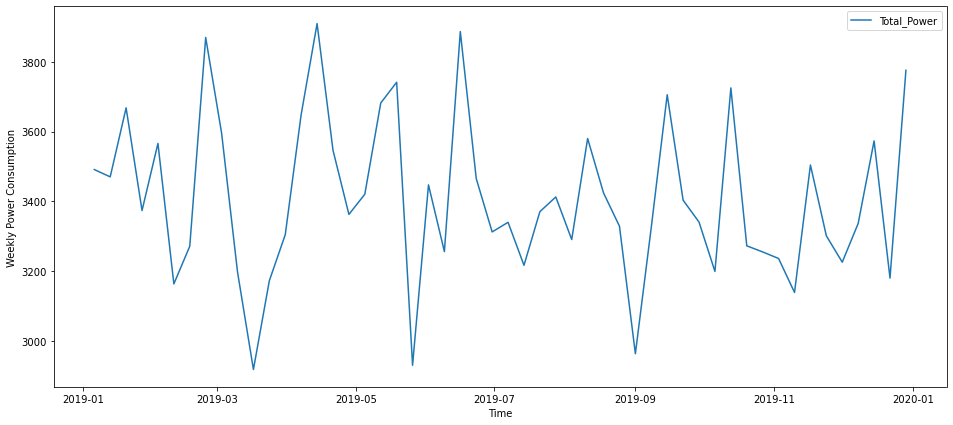

In [14]:
plt.figure(figsize=(16,7))
fig=plt.figure(1)
ax1=fig.add_subplot(111)
sns.lineplot(data=df_wtr)
ax1.set_xlabel('Time')
ax1.set_ylabel('Weekly Power Consumption')

## Exponential Smoothing

<AxesSubplot:xlabel='Date'>

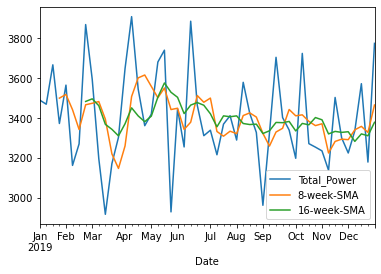

In [15]:
new=pd.DataFrame()
new['Total_Power']=df_wtr['Total_Power']
new['8-week-SMA'] = df_wtr['Total_Power'].rolling(window=4).mean()
new['16-week-SMA'] = df_wtr['Total_Power'].rolling(window=8).mean()
new.plot()

### Decomposing the time series model

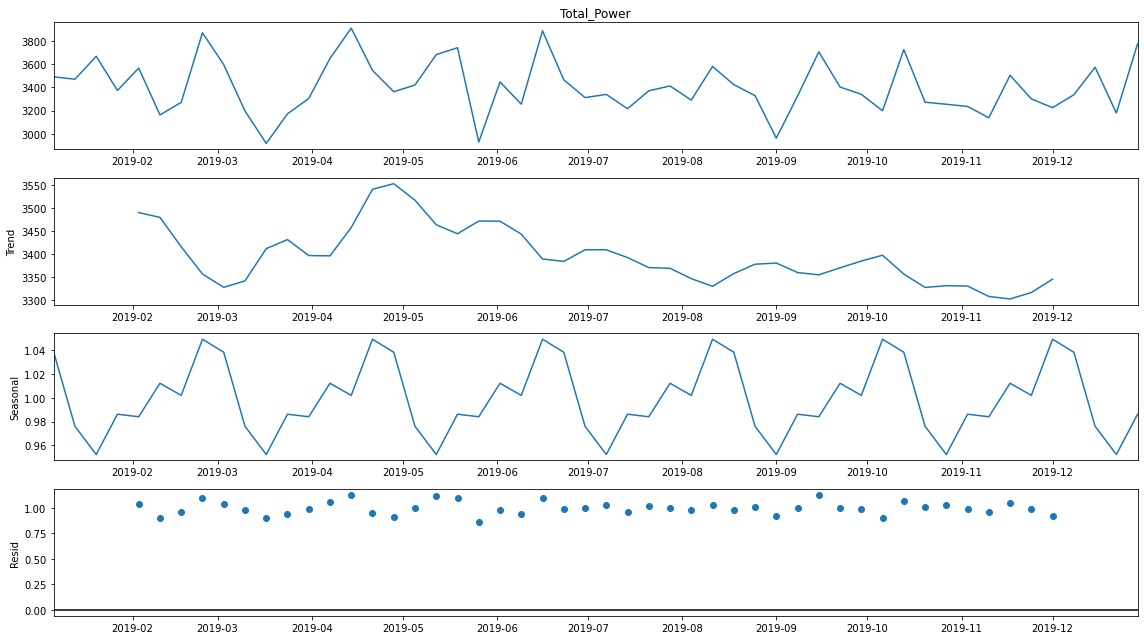

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result= seasonal_decompose(df_wtr['Total_Power'],model='multiplicative',period=8)
fig = result.plot()
fig.set_size_inches((16, 9))
# Tight layout to realign things
fig.tight_layout()
plt.show()

### Applying Holtwinters Exponential Smoothing

In [17]:
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [18]:
# Set the value of Alpha and define m (Time Period)
w= 26
alpha = 1/(2*w)

<AxesSubplot:title={'center':'Holt Winter Exponential Smoothing'}, xlabel='Date'>

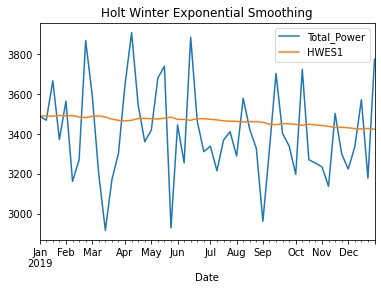

In [19]:
df_wtr['HWES1']=SimpleExpSmoothing(df_wtr['Total_Power']).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues
df_wtr[['Total_Power','HWES1']].plot(title="Holt Winter Exponential Smoothing")

<Figure size 1800x864 with 0 Axes>

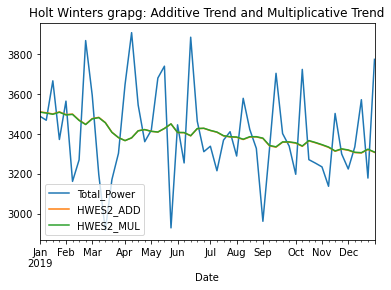

In [20]:
plt.figure(figsize=(25, 12))
df_wtr['HWES2_ADD'] = ExponentialSmoothing(df_wtr['Total_Power'],trend='add').fit().fittedvalues
df_wtr['HWES2_MUL'] = ExponentialSmoothing(df_wtr['Total_Power'],trend='mul').fit().fittedvalues
df_wtr[['Total_Power','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters grapg: Additive Trend and Multiplicative Trend').autoscale(axis='x',tight=True)
# Split into train and test se


In [21]:
fitted_model=ExponentialSmoothing(endog=df_wtr['Total_Power'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [22]:
test_prediction=fitted_model.forecast(20)
test_prediction

2020-01-05    3442.547043
2020-01-12    3259.468473
2020-01-19    3318.254581
2020-01-26    3556.387446
2020-02-02    3217.127686
2020-02-09    3311.345646
2020-02-16    3057.570397
2020-02-23    3352.095842
2020-03-01    3393.314831
2020-03-08    3411.434127
2020-03-15    3427.248727
2020-03-22    3359.473880
2020-03-29    3426.465125
2020-04-05    3244.241810
2020-04-12    3302.753297
2020-04-19    3539.773721
2020-04-26    3202.098818
2020-05-03    3295.876638
2020-05-10    3043.286904
2020-05-17    3336.436468
Freq: W-SUN, dtype: float64

<AxesSubplot:xlabel='Date'>

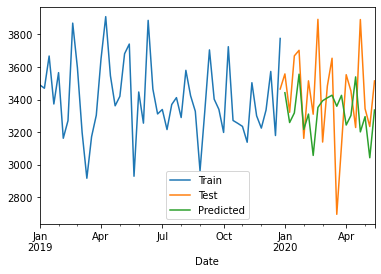

In [23]:
df_wtr['Total_Power'].plot(legend=True,label='Train')
df_wte['Total_Power'].plot(legend=True,label='Test')
test_prediction.plot(legend=True,label='Predicted')

## Determining Rotating Statistics

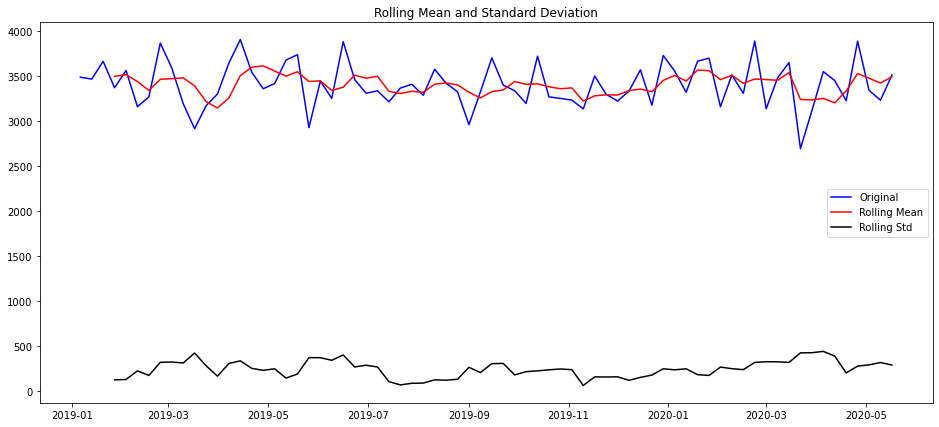

In [24]:
# Determining the rolling statisctics
rollmean=df_w.rolling(4).mean()
rollstd=df_w.rolling(4).std()
plt.figure(figsize=(16,7))
fig=plt.figure(1)
orig=plt.plot(df_w['Total_Power'],color='blue',label='Original')
mean=plt.plot(rollmean,color='red',label='Rolling Mean')
std=plt.plot(rollstd,color='black',label='Rolling Std')
plt.legend(loc="best")
plt.title("Rolling Mean and Standard Deviation")
plt.show(block=False)

### As we see here the mean and standard deviation of the data is almost constant with time so the can be termed as almost stationary time series

In [25]:
# augmented dickey fuller test
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rcParams.update({'figure.figsize':(15,10), 'figure.dpi':120})


In [26]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df_w['Total_Power'], autolag = 'AIC')
print("1. ADF : ",dftest[0])
print("2. P-Value : ", dftest[1])
print("3. Num Of Lags : ", dftest[2])
print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
print("5. Critical Values :")
for key, val in dftest[4].items():
    print("\t",key, ": ", val)

1. ADF :  -7.115055461963384
2. P-Value :  3.850098667813879e-10
3. Num Of Lags :  1
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 70
5. Critical Values :
	 1% :  -3.5274258688046647
	 5% :  -2.903810816326531
	 10% :  -2.5893204081632653


In [27]:
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

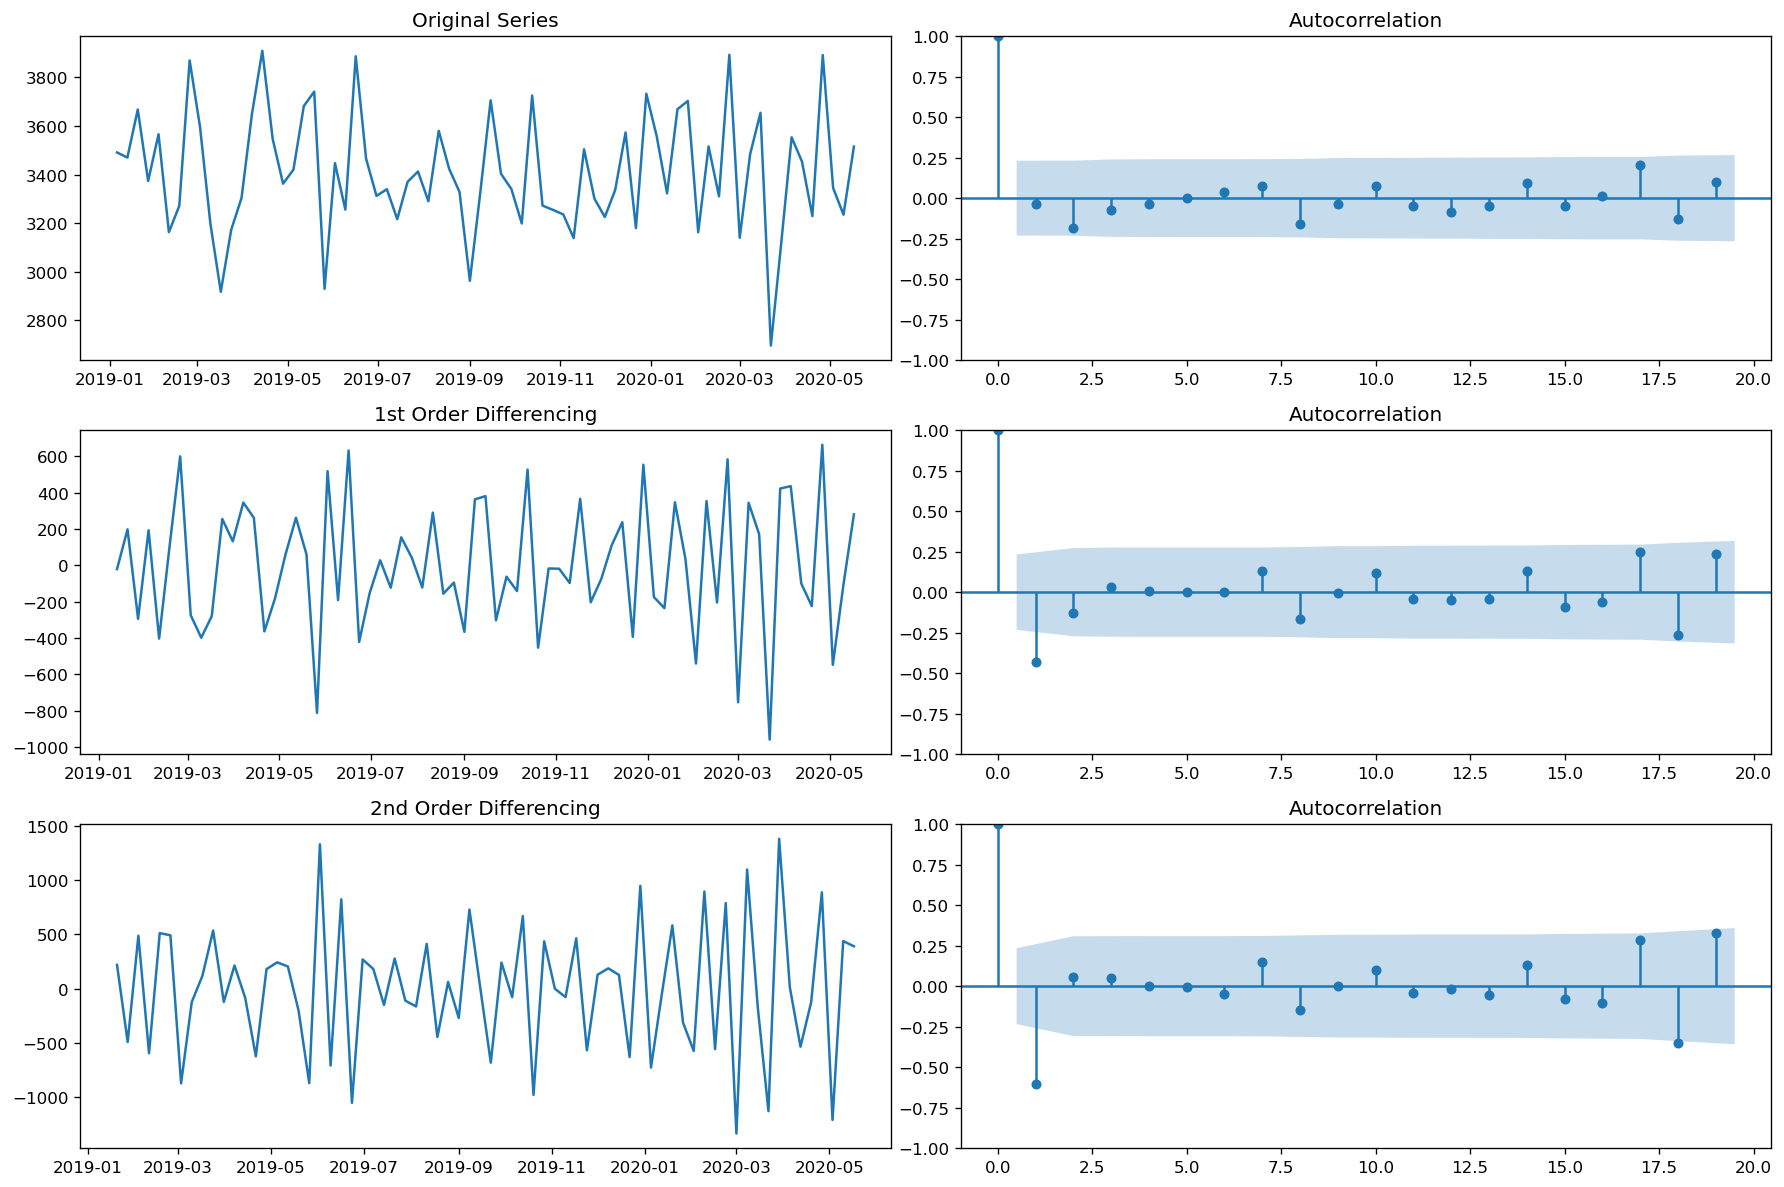

In [28]:
# Original Series
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_w); axes[0, 0].set_title('Original Series')
plot_acf(df_w, ax=axes[0, 1])
# 1st Differencing
axes[1, 0].plot(df_w.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_w.diff().dropna(), ax=axes[1, 1])
# 2nd Differencing
axes[2, 0].plot(df_w.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_w.diff().diff().dropna(), ax=axes[2, 1])
fig.tight_layout()
plt.show()

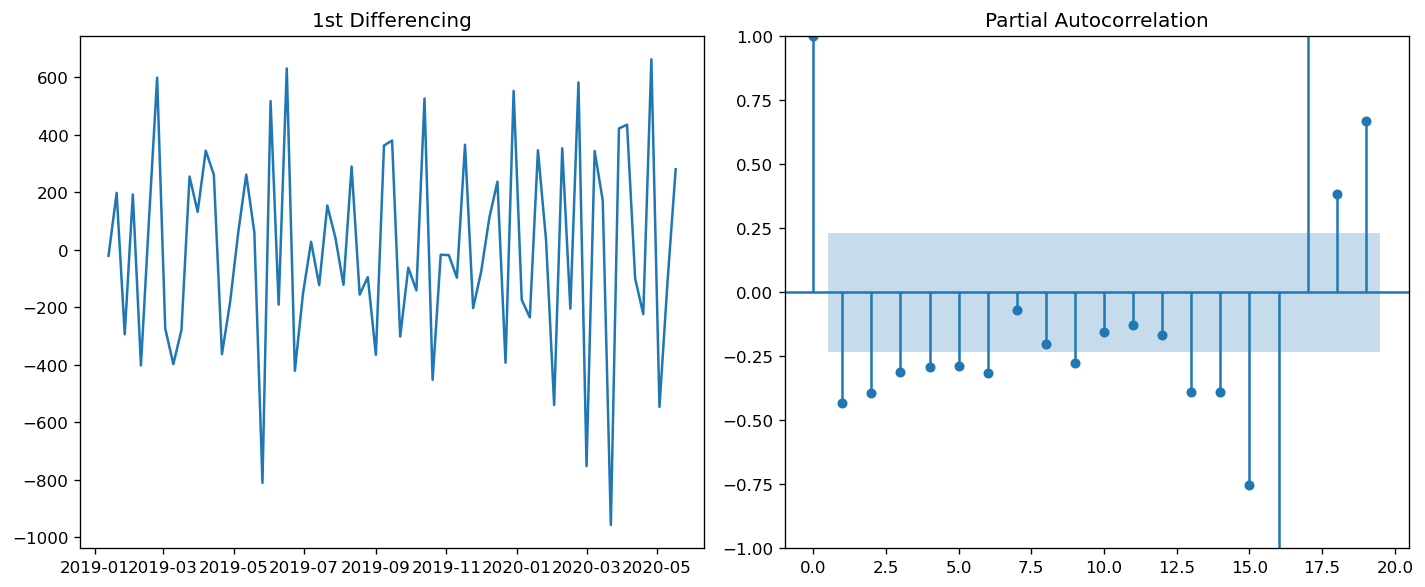

In [29]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(12,5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2)
axes[0].plot(df_w.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df_w.diff().dropna(), ax=axes[1])
fig.tight_layout()
plt.show()


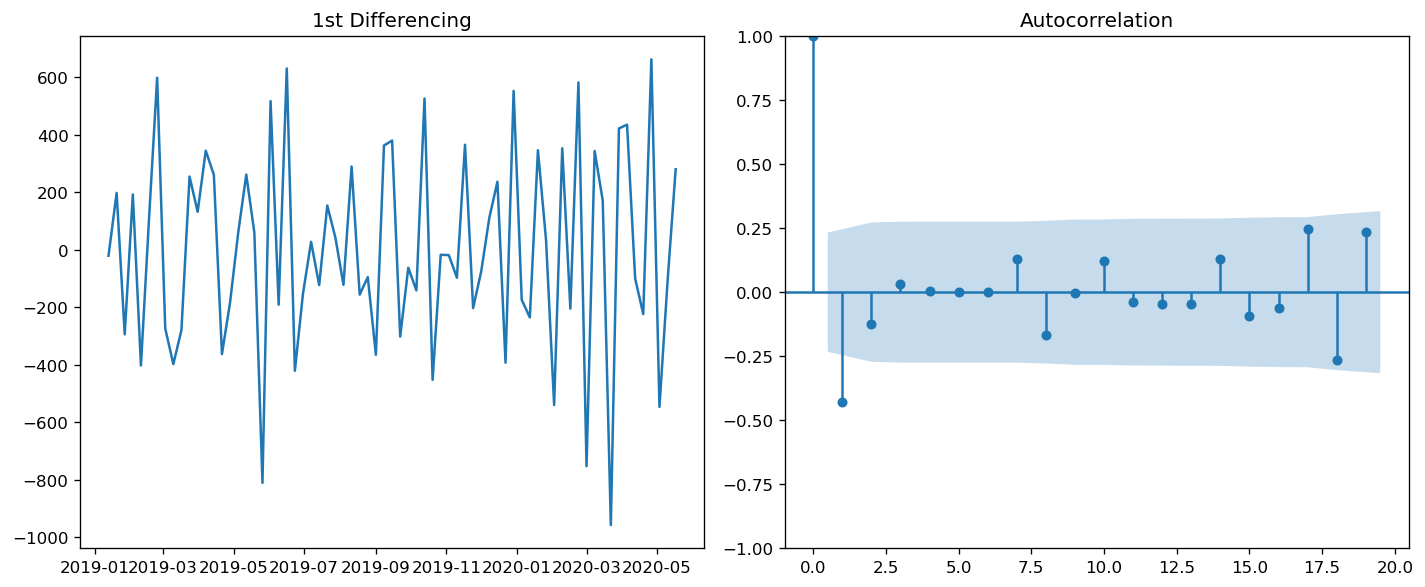

In [30]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df_w.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df_w.diff().dropna(), ax=axes[1])
fig.tight_layout()
plt.show()

### Conclusion
     1. We will take p=1,d=1 and q=1 for our ARIMA model

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# 1,1,1 ARIMA Model
model1 = ARIMA(df_w, order=(1,1,2))
model_fit1 = model1.fit()
print(model_fit1.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Power   No. Observations:                   72
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -493.406
Date:                Wed, 14 Dec 2022   AIC                            994.811
Time:                        14:49:37   BIC                           1003.862
Sample:                    01-06-2019   HQIC                           998.410
                         - 05-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8805      0.334     -2.636      0.008      -1.535      -0.226
ma.L1         -0.0800      0.357     -0.224      0.823      -0.780       0.620
ma.L2         -0.9198      0.281     -3.268      0.0

In [32]:
# 1,1,1 ARIMA Model
model2 = ARIMA(df_w, order=(2,0,1))
model_fit2 = model2.fit()
print(model_fit2.summary())

                               SARIMAX Results                                
Dep. Variable:            Total_Power   No. Observations:                   72
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -495.458
Date:                Wed, 14 Dec 2022   AIC                           1000.917
Time:                        14:49:37   BIC                           1012.300
Sample:                    01-06-2019   HQIC                          1005.449
                         - 05-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3403.3723      5.635    603.936      0.000    3392.327    3414.417
ar.L1          0.8640      0.136      6.371      0.000       0.598       1.130
ar.L2         -0.0561      0.132     -0.424      0.6

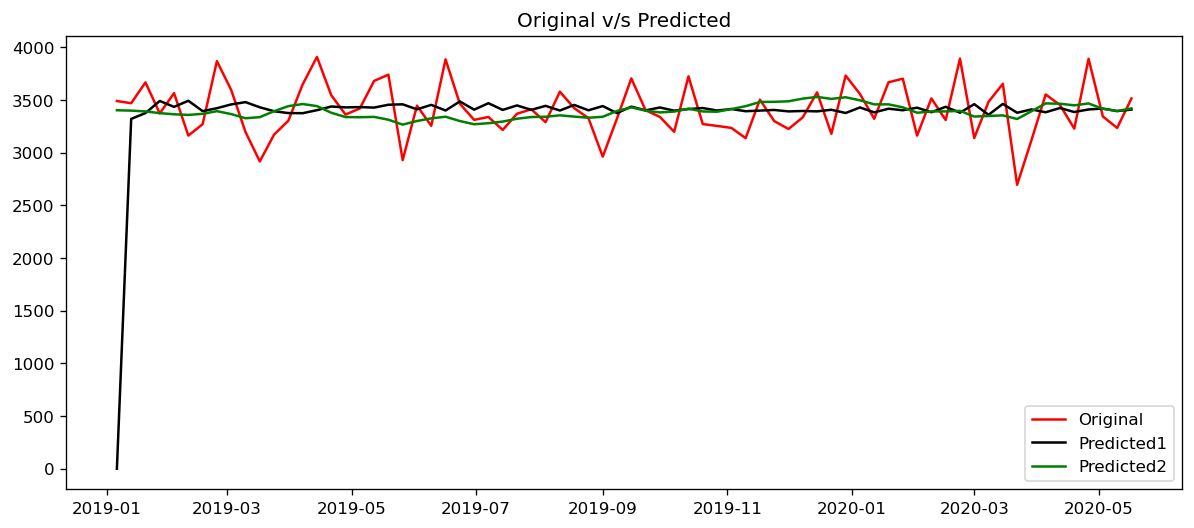

In [33]:
# Actual vs Fitted
t=model_fit1.predict(dynamic=False)
p=model_fit2.predict(dynamic=False)

org=plt.plot(df_w,color='red',label='Original')
pre1=plt.plot(t,color='black',label='Predicted1')
pre2=plt.plot(p,color='green',label='Predicted2')

plt.legend(loc="best")
plt.title("Original v/s Predicted")
plt.show(block=False)

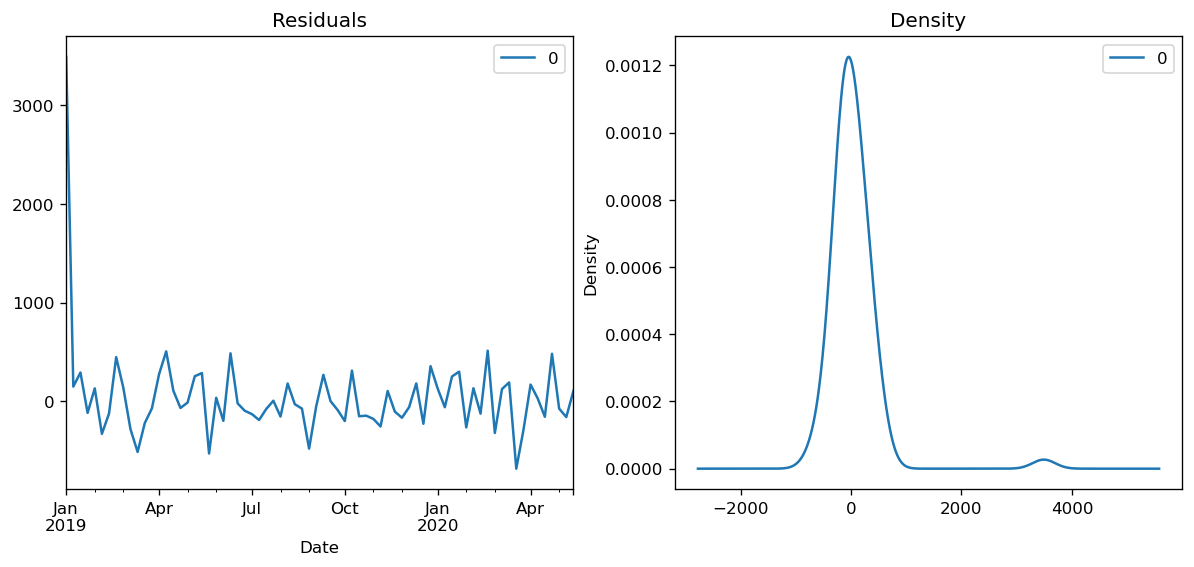

In [34]:
# Plot residual errors
residuals = pd.DataFrame(model_fit1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## SARIMAX

In [35]:
import pmdarima as pm
stepwise_model = pm.auto_arima(df_wtr['Total_Power'],start_p=1, d=0, start_q=1,
                            max_p=12, max_q=12,
                            m=12,
                            seasonal=True, stationary=True,
                            information_criterion='aic',
                            stepwise=False,
                            suppress_warnings=True)
stepwise_model.fit(df_wtr['Total_Power'])

ARIMA(order=(0, 0, 3), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [36]:
ts_pred_auto = stepwise_model.predict(n_periods=22)

ValueError: x and y must have same first dimension, but have shapes (21,) and (22,)

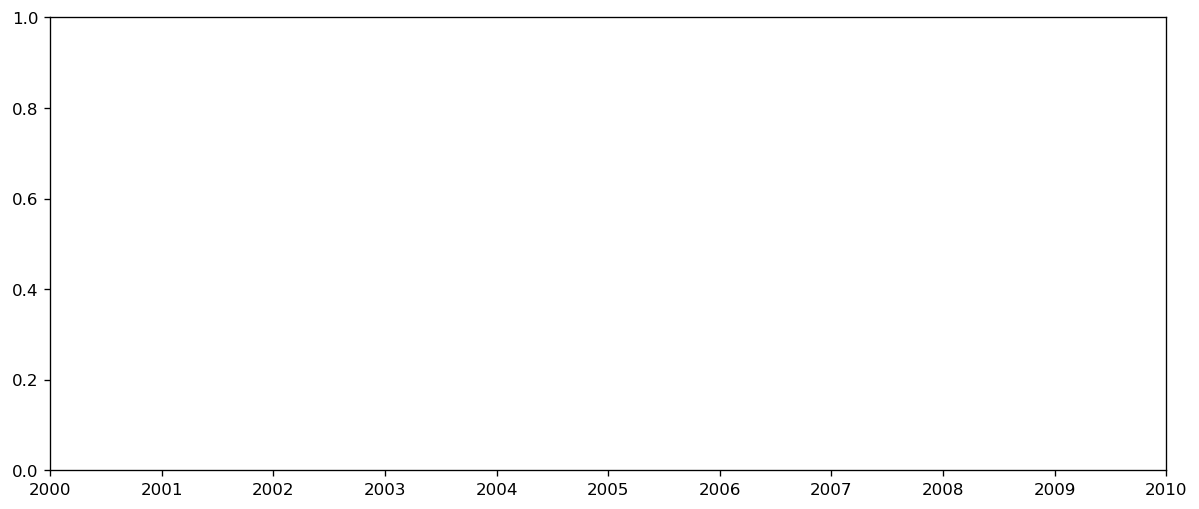

In [37]:
plt.plot(df_wte.index,ts_pred_auto, label='auto sarima')
plt.plot(df_wte['Total_Power'], label='actual')
plt.title('Single-step Forecasting (automatic parameters)')
plt.grid()
plt.xticks(rotation=90)
plt.legend()
plt.show()